In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# SPLITTING THE DATASET
df = pd.read_csv('DATASET-balanced 1.csv')
x = df.drop('LABEL', axis = 1)
y = df['LABEL']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# Define base models
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = SVC(random_state=42)

# Define stacking model
stacking_model = StackingClassifier(estimators=[('lr', model1), ('rf', model2), ('svm', model3)], final_estimator=LogisticRegression())

# Fit the stacking model on the training set
stacking_model.fit(x_train, y_train)

# Predict on the testing set
y_pred = stacking_model.predict(x_test)

# Print the accuracy score
print("Accuracy score:", stacking_model.score(x_test, y_test))

Accuracy score: 0.9885398981324278


In [3]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 3)
auc = round(roc_auc_score(y_test, y_pred), 3)
prec = round(precision_score(y_test, y_pred, average="binary", pos_label=1), 3)
rec = round(recall_score(y_test, y_pred, average="binary", pos_label=1), 3)
f1 = round(f1_score(y_test, y_pred, average="binary", pos_label=1), 3)
mcc = round(matthews_corrcoef(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)

In [4]:
print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("MCC:", mcc)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE):", mae)

 Accuracy: 98.854%
 AUC score: 0.988
Precision: 0.985
Recall: 0.993
F1-score: 0.989
MCC: 0.977
Mean Squared Error (MSE) : 0.011
Mean Absolute Error (MAE): 0.011


Confusion Matrix:
[[1119   18]
 [   9 1210]]


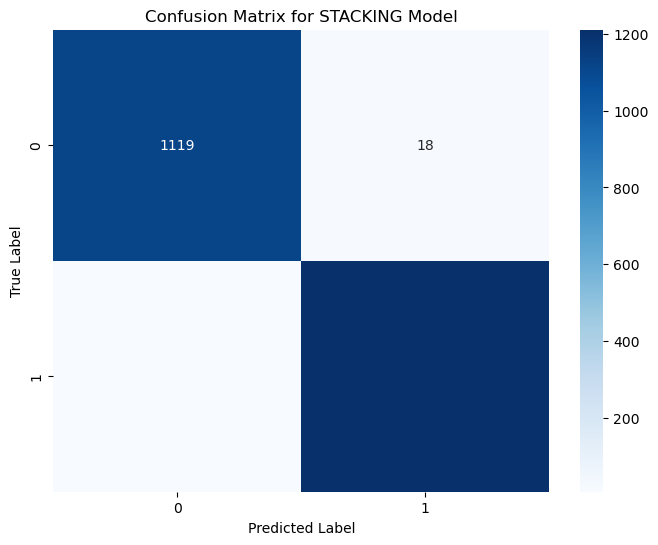

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the heat map for AdaBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for STACKING Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()